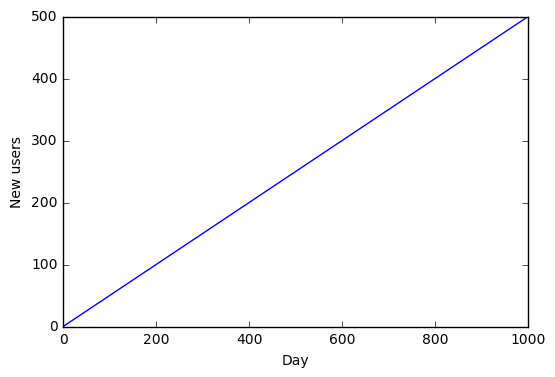

In [169]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import logistic


# Model inputs: List them later.
t = np.linspace(0,1000,1001) # [days]

# N: Number of new users per day vs time t
# N = np.full((len(t),1),100) # constant growth model e.g. 100 new users per day
N = 0.5*t # linear growth model
# N = np.exp(t/150) # exponential growth model

plt.plot(t,N)
plt.xlabel('Day')
plt.ylabel('New users')


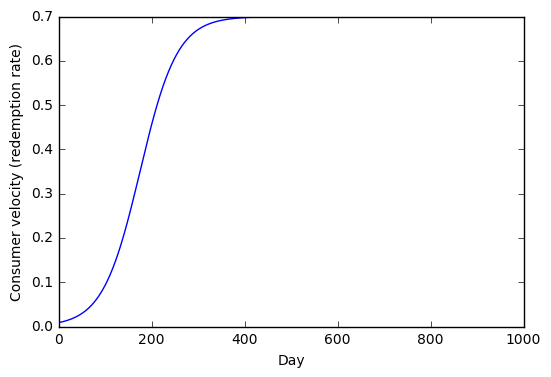

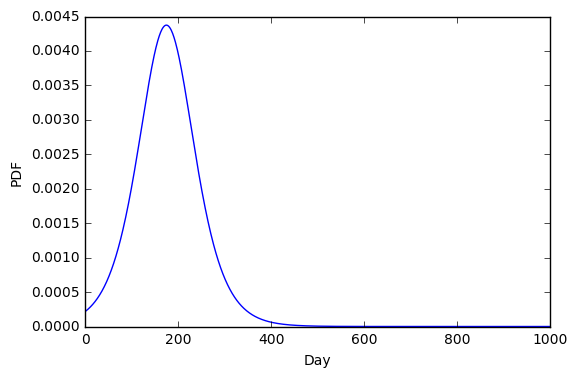

In [170]:
# Modeling velocity of consumer token redemption

# Sigmoid input model following some statistics
# on consumer behavior with cash back rewards.
# Pessimistic given many redemption rate studies
# have projected even lower rates (velocities).
V_redeem = 0.7 / (1 + np.exp(-(t-175)/40)) # Probability of redemption by day t... 38% at 6 months; 30% breakage

# Probability density function (derivative of CDF above)
PDF = np.zeros(V_redeem.shape,np.float)
PDF[0:-1] = np.diff(V_redeem)/np.diff(t)
PDF[-1] = (V_redeem[-1] - V_redeem[-2])/(t[-1] - t[-2])


f = plt.figure(1)
plt.plot(t,V_redeem)
f.show()
plt.xlabel('Day')
plt.ylabel('Consumer velocity (redemption rate)')

g = plt.figure(2)
plt.plot(t,PDF)
g.show()
plt.xlabel('Day')
plt.ylabel('PDF')



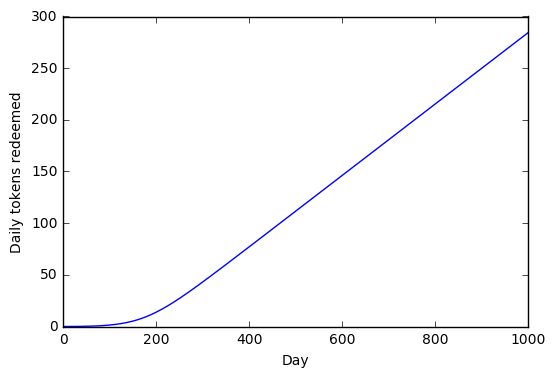

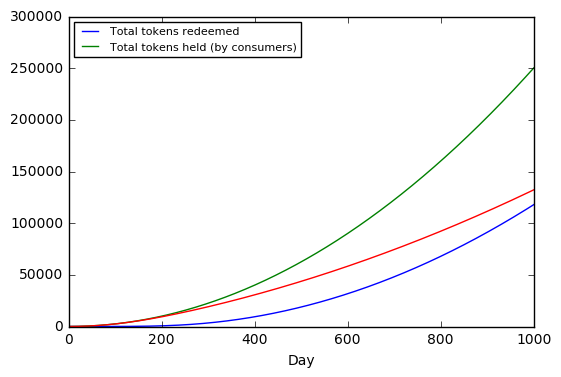

In [174]:
# Modeling consumer token supply

token_issuance = 1  # Per new user. Simplification assuming each new user starts with 1 token.
                    # Should actually follow issuance schedule.
tokens_mined = N*token_issuance # Number of new tokens per day issued versus time t.
                                # Simplified for first-time data mining by new users only for now

matrix_redeem = [[0 for x in range(len(t))] for y in range(len(t))] 

for i in range(len(t)):
    matrix_redeem[i][i:] = N[i]*PDF[:len(t)-i]


tokens_redeemed = np.sum(matrix_redeem, axis=0)

f = plt.figure(1)
plt.plot(tokens_redeemed)
f.show()
plt.xlabel('Day')
plt.ylabel('Daily tokens redeemed')


sum_redeemed = np.cumsum(tokens_redeemed)
sum_mined = np.cumsum(tokens_mined)

g = plt.figure(2)
plt.plot(t,sum_redeemed, label='Total tokens redeemed')
plt.plot(t,sum_mined, label='Total tokens held (by consumers)')
plt.plot(t,sum_mined-sum_redeemed)
g.show()
plt.xlabel('Day')
plt.legend(loc='upper left', fontsize=8)

